In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,NaN,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,NaN,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	100
float64		column 2	350
float64		column 3	50
float64		column 4	100
float64		column 5	250
float64		column 6	150
float64		column 7	150
float64		column 8	300
float64		column 9	150
float64		column 10	350
float64		column 11	250
float64		column 12	200
float64		column 13	150
float64		column 14	200
float64		column 15	200
float64		column 16	250
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19900.000000,19650.000000,19950.000000,19900.000000,19750.000000,19850.000000,19850.000000,19700.00000,19850.000000,19650.000000,19750.000000,19800.000000,19850.000000,19800.000000,19800.000000,19750.000000,0.0
mean,4.022261,7.041374,5.121003,5.371156,3.501215,6.898237,7.498388,4.61736,5.176877,8.277812,6.450481,7.929798,3.043174,8.337626,3.693232,7.806278,NaN
std,1.909600,3.282618,2.012641,2.257403,2.179562,2.021403,2.317927,2.67776,2.374546,2.471358,2.617641,2.073629,2.326622,1.539617,2.560197,1.609991,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.00000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.00000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.00000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

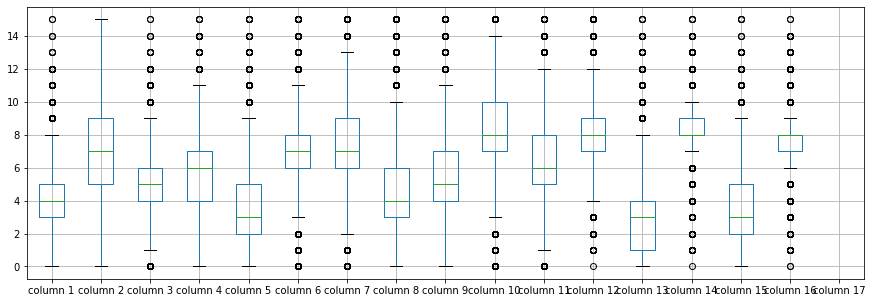

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.022261
column 2     7.041374
column 3     5.121003
column 4     5.371156
column 5     3.501215
column 6     6.898237
column 7     7.498388
column 8     4.617360
column 9     5.176877
column 10    8.277812
column 11    6.450481
column 12    7.929798
column 13    3.043174
column 14    8.337626
column 15    3.693232
column 16    7.806278
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.754906,0.851163,0.672349,0.617295,-0.034586,0.046274,0.014146,0.050572,0.146420,0.036839,-0.045488,0.486984,0.097369,0.273553,-0.103360,NaN
column 2,0.754906,1.000000,0.668113,0.821498,0.551078,0.042845,-0.040417,-0.026569,0.095841,0.155555,-0.051249,-0.007152,0.270197,-0.000207,0.230927,-0.042766,NaN
column 3,0.851163,0.668113,1.000000,0.658978,0.764014,0.060226,0.025331,-0.098723,0.056471,0.114528,0.012653,-0.044149,0.554535,0.044629,0.261160,-0.117436,NaN
column 4,0.672349,0.821498,0.658978,1.000000,0.642547,0.040454,-0.019496,0.079975,0.057907,0.010908,-0.012447,0.026711,0.263910,0.025778,0.296953,-0.017285,NaN
column 5,0.617295,0.551078,0.764014,0.642547,1.000000,0.136668,-0.029561,-0.010902,-0.066268,-0.071300,-0.072257,-0.039388,0.624686,0.015703,0.490893,-0.063156,NaN
column 6,-0.034586,0.042845,0.060226,0.040454,0.136668,1.000000,-0.355921,-0.052795,-0.121678,0.082388,-0.342361,-0.029283,0.141230,-0.251600,0.126147,0.246905,NaN
column 7,0.046274,-0.040417,0.025331,-0.019496,-0.029561,-0.355921,1.000000,-0.117794,-0.050237,0.178400,0.598917,-0.270336,-0.035774,0.551771,-0.077677,-0.206219,NaN
column 8,0.014146,-0.026569,-0.098723,0.079975,-0.010902,-0.052795,-0.117794,1.000000,-0.185970,-0.315284,0.038562,0.082651,0.140106,-0.083957,0.007926,0.181961,NaN
column 9,0.050572,0.095841,0.056471,0.057907,-0.066268,-0.121678,-0.050237,-0.185970,1.000000,0.130519,-0.060750,0.117970,-0.382949,-0.053708,0.275269,-0.058502,NaN
column 10,0.146420,0.155555,0.114528,0.010908,-0.071300,0.082388,0.178400,-0.315284,0.130519,1.000000,0.056242,-0.107329,-0.177425,0.029521,-0.087578,-0.112400,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.8553284210205
Epoch: 1 , loss: 50.87355686035156
Epoch: 2 , loss: 46.268879327392575
Epoch: 3 , loss: 44.44361151123047
Epoch: 4 , loss: 43.44175172119141
Epoch: 5 , loss: 42.51001465454102
Epoch: 6 , loss: 42.20682837219238
Epoch: 7 , loss: 42.13137677001953
Epoch: 8 , loss: 41.81949754943847
Epoch: 9 , loss: 41.67060242919922
Epoch: 10 , loss: 41.533981951904295
Epoch: 11 , loss: 41.484406759643555
Epoch: 12 , loss: 41.24362890625
Epoch: 13 , loss: 41.124964053344726
Epoch: 14 , loss: 41.02426801757812
Epoch: 15 , loss: 41.01284062652588
Epoch: 16 , loss: 41.005998727416994
Epoch: 17 , loss: 40.90133551330566
Epoch: 18 , loss: 40.828203793334964
Epoch: 19 , loss: 40.812520831298826
Epoch: 20 , loss: 40.821495346069334
Epoch: 21 , loss: 40.72886202392578
Epoch: 22 , loss: 40.671418365478516
Epoch: 23 , loss: 40.51435820922852
Epoch: 24 , loss: 40.57638718261719
Epoch: 25 , loss: 40.31290224914551
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.0000
column 2     7.0000
column 3     3.0000
column 4     5.0000
column 5     1.0000
column 6     1.0000
column 7     1.0000
column 8     5.0000
column 9     5.0000
column 10    0.0000
column 11    1.0000
column 12    6.0000
column 13    0.0000
column 14    8.0000
column 15    0.0000
column 16    8.0000
column 17   -0.0027
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.774941,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.975767,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

194.72280494332938

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.05215114602506533

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000534
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.000000,11.0,7.0,7.0,1.0,8.0,5.0,8.774941,-0.004312
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.000000,8.0,7.0,9.0,2.0,9.0,7.0,10.000000,-0.003348
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.000000,11.0,2.0,8.0,2.0,5.0,5.0,10.000000,-0.002075
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.000000,7.0,6.0,8.0,3.0,8.0,0.0,8.000000,-0.003285
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.000000,10.0,7.0,9.0,3.0,8.0,3.0,7.000000,-0.004586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.000000,12.0,10.0,9.0,2.0,9.0,2.0,6.000000,-0.004285
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,4.024233,12.0,6.0,8.0,1.0,9.0,6.0,8.000000,-0.001933
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.000000,10.0,7.0,6.0,3.0,9.0,3.0,7.000000,-0.001288
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.000000,1.0,0.0,7.0,0.0,8.0,0.0,8.000000,-0.003260


In [21]:
imputations[-1].to_excel("Letter_NL_1(imp).xlsx", index=False, header=False)